**Objective**
->To get information about the best time of year to book a hotel room .->The optimal length of stay in order to get the best daily rate.
->To predict whether or not a hotel was likely to receive a
  disproportionately high number of special requests.

**Business Problem**
-> To minimize high cancellation rates.

 This can lead to a number of issues like decreased revenue, underutilized room,overbooking can lead to operational stress for staff etc.

In [49]:
# Importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
#To access the files stored in Drive account from within Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Hotel Booking Analysis
#Description of dataset
This data set contains booking information for a city hotel and a resort hotel, and includes information such as
when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available
parking spaces etc.
The dataset contains a total of 119390 rows and 32 columns.
The columns in the dataset are as follows:
- hotel: Name of hotel ( City or Resort)
- is_canceled: Whether the booking is canceled or not (0 for no canceled and 1 for canceled)
- lead_time: time (in days) between booking transaction and actual arrival.
- arrival_date_year: Year of arrival
- arrival_date_month: month of arrival
- arrival_date_week_number: week number of arrival date.
- arrival_date_day_of_month: Day of month of arrival date
- stays_in_weekend_nights: No. of weekend nights spent in a hotel
- stays_in_week_nights: No. of weeknights spent in a hotel
- adults: No. of adults in single booking record.
- children: No. of children in single booking record.
- babies: No. of babies in single booking record.
- meal: Type of meal chosen
- country: Country of origin of customers (as mentioned by them)
- market_segment: What segment via booking was made and for what purpose.
- distribution_channel: Via which medium booking was made.
- is_repeated_guest: Whether the customer has made any booking before(0 for No and 1 for Yes)
- previous_cancellations: No. of previous canceled bookings.
- previous_bookings_not_canceled: No. of previous non-canceled bookings.
- reserved_room_type: Room type reserved by a customer.
- assigned_room_type: Room type assigned to the customer.
- booking_changes: No. of booking changes done by customers
- deposit_type: Type of deposit at the time of making a booking (No deposit/ Refundable/ No refund)
- agent: Id of agent for booking
- company: Id of the company making a booking
- days_in_waiting_list: No. of days on waiting list.
- customer_type: Type of customer(Transient, Group, etc.)
- adr: Average Daily rate.
- required_car_parking_spaces: No. of car parking asked in booking
- total_of_special_requests: total no. of special request.
- reservation_status: Whether a customer has checked out or canceled,or not showed
- reservation_status_date: Date of making reservation status.


In [51]:
# loading the dataset
df = pd.read_csv('/content/drive/MyDrive/dataset_alma/Hotel Bookings.csv')

In [52]:
#Top five rows of dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [53]:
# Display all columns
pd.set_option('display.max_columns', None)

In [54]:
# last 20 rows
df.tail(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119370,City Hotel,0,201,2017,August,35,30,1,4,1,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,108.00,0,2,Check-Out,2017-09-04
119371,City Hotel,0,175,2017,August,35,31,1,3,2,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,42.0,NaN,0,Transient,86.85,0,2,Check-Out,2017-09-04
119372,City Hotel,0,175,2017,August,35,31,1,3,1,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,NaN,0,Transient,82.35,0,1,Check-Out,2017-09-04
119373,City Hotel,0,175,2017,August,35,31,1,3,1,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,NaN,0,Transient,82.35,0,1,Check-Out,2017-09-04
119374,City Hotel,0,201,2017,August,35,29,1,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,117.00,0,2,Check-Out,2017-09-04
119375,City Hotel,0,200,2017,August,35,30,1,4,2,0.0,0,BB,AUT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,16.0,NaN,0,Transient,85.50,0,1,Check-Out,2017-09-04
119376,City Hotel,0,165,2017,August,35,29,1,5,3,0.0,0,BB,AUT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,209.25,0,3,Check-Out,2017-09-04
119377,City Hotel,0,185,2017,August,35,30,1,4,2,0.0,0,SC,CHE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,99.00,0,1,Check-Out,2017-09-04
119378,City Hotel,0,247,2017,August,35,31,1,3,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,NaN,0,Transient,86.85,0,0,Check-Out,2017-09-04
119379,City Hotel,0,109,2017,August,35,31,1,3,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,155.00,0,1,Check-Out,2017-09-04


In [55]:
#Information about the number of rows and columns
df.shape

(119390, 32)

In [56]:
# To get  the information about the dataframe i.e. index dtype and columns, non nulls values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [57]:
# some basic statistical details like percentile, mean, std, etc. of numeric values
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [58]:
# To check the the unique values attained by hotel column
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [59]:
# To check the the unique values attained by 'is_canceled'column
df['is_canceled'].unique()

array([0, 1])

In [60]:
# To check the the unique values attained by 'arrival_date_year'column
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [61]:
# To check the the unique values attained by 'meal'column
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [62]:
# To check the the unique values attained by 'market_segment'column
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [63]:
# To check the the unique values attained by 'distribution_channel'column
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [64]:
# To check the the unique values attained by 'children'column
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

Data Cleaning

In [65]:
# Removing the duplicates
df.drop_duplicates(inplace = True)


Handling missing values

In [66]:
#Columns having missing values.
df.isnull().sum().sort_values(ascending = False)

,0
company,82137
agent,12193
country,452
children,4
reserved_room_type,0
assigned_room_type,0
booking_changes,0
deposit_type,0
hotel,0
previous_cancellations,0


The columns company and agent have large number of missing values, which may be because customer didn't book through any company or agent.

In [67]:
#Replacing ''na' with zero
df[['company','agent']] = df[['company','agent']].fillna(0)

In [68]:
# Handling missing values of country column
mode_country = df['country'].mode().values[0]
#mode_country
df['country'] = df['country'].fillna(mode_country)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [69]:
# Checking the rows with zero customers
df[df['adults']+df['babies']+df['children'] == 0].shape

(166, 32)

In some rows the total sum of adults,babies and children are zero.So, we can remove such rows

In [70]:
# Dropping the rows with zero customers
df.drop(df[df['adults']+df['babies']+df['children'] == 0].index, inplace = True)

In [71]:
# Adding total people num as column, i.e. total people num
df['total_people'] = df['adults']+df['children']+df['babies']

In [72]:
# #Adding total staying days in hotels
df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

Data Visualisation

In [73]:
# Getting numeric data
num_df = df.select_dtypes(include = ['int64','float64'])
num_df.columns


Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_people', 'total_stay'],
      dtype='object')

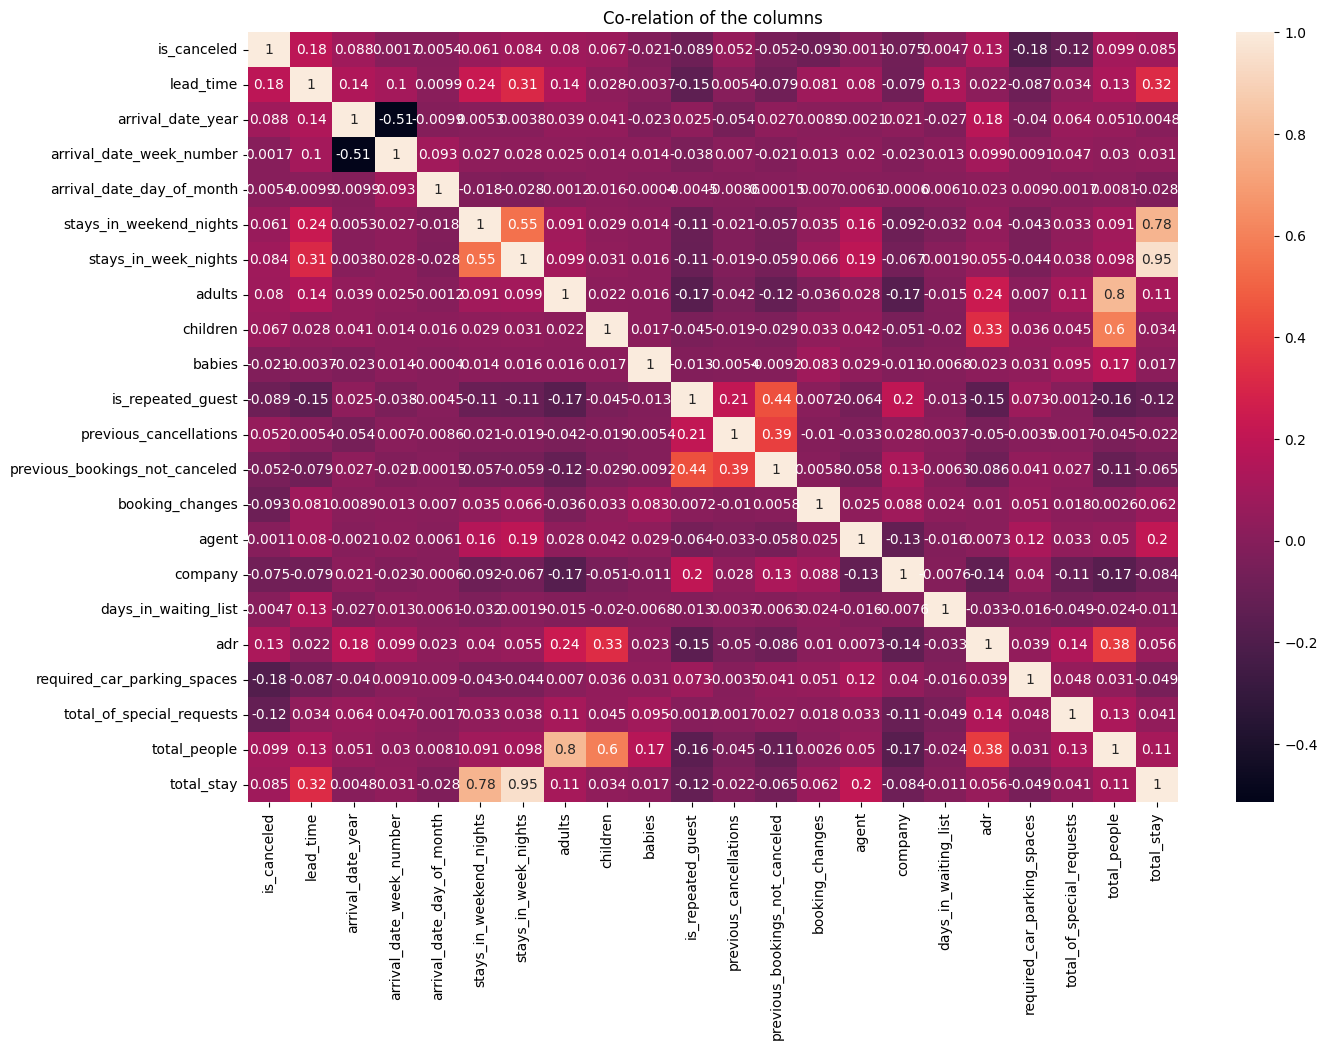

In [74]:
# Correlation between columns
plt.figure(figsize=(15,10))
sns.heatmap(num_df.corr(),annot=True)
plt.title('Co-relation of the columns')
plt.show()

Insights:
Brighter colors (e.g., red) indicate a stronger positive correlation, while darker colors (e.g., blue) indicate a stronger negative correlation.

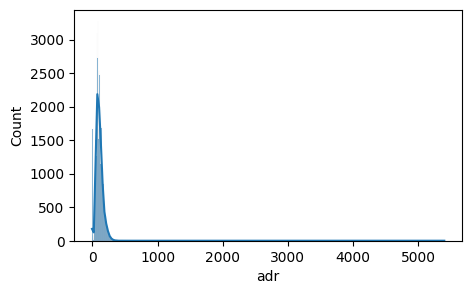

In [27]:
# plotting adr
plt.figure(figsize=(5,3))
sns.histplot(x=df['adr'], kde = True)
plt.show()



Insight:
'adr' stands for Average Daily Rate which is average price paid for a hotel room over a given period of time which is approx 1000.



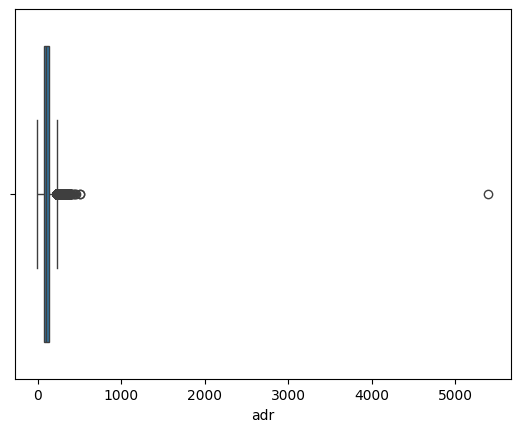

In [28]:
sns.boxplot(x=df['adr'])
plt.show()

Insight:
There are outliers among adr values.

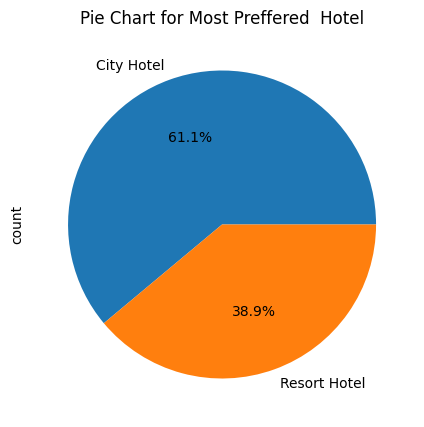

In [29]:
# Visualising the by pie chart.
df['hotel'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(5,5),fontsize=10)
plt.title('Pie Chart for Most Preffered  Hotel')
plt.show()

Insight:
City Hotel is mostly preffered over resort hotel by guests and has maximum bookings.

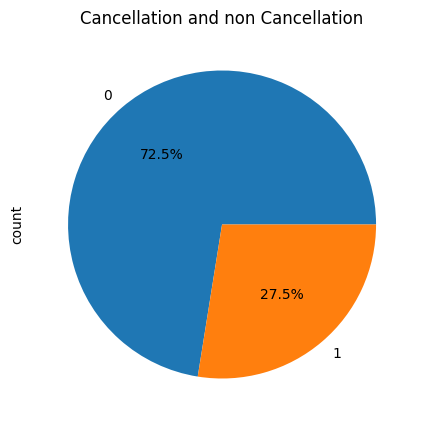

In [30]:
# Visualising the by pie chart.
df['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(5,5),fontsize=10)
plt.title('Cancellation and non Cancellation')
plt.show()

Insight:
This shows approx 27.5% of bookings are cancelled.

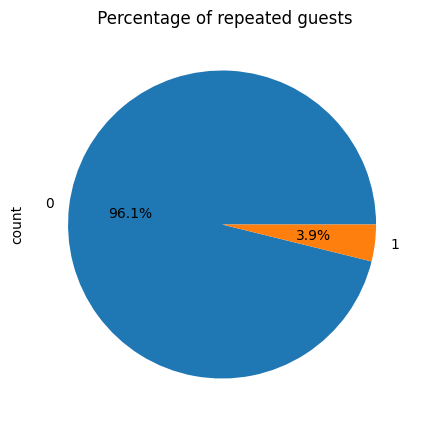

In [31]:
df['is_repeated_guest'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,5),fontsize=10)
plt.title(" Percentage of repeated guests")
plt.show()

Insight:
The percentage of repeated guests are very few, which is around 3.9 %.

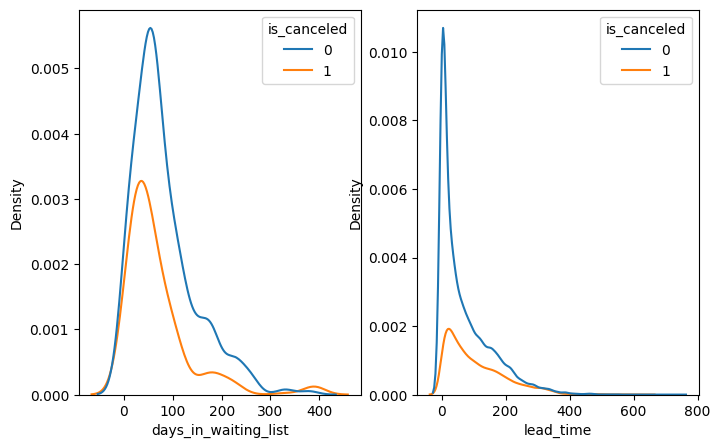

In [32]:
# Selecting bookings with non zero waiting time
waiting_bookings = df[df['days_in_waiting_list'] !=0]

fig, axes = plt.subplots(1, 2, figsize=(8, 5))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = df['lead_time'], hue = df['is_canceled'])
plt.show()

Insight:
The lead time seems to have no effect on cancelation as both the curves of cancelation and non-cancelation are similar in both graph.

In [33]:
#country_df = df['country'].value_counts().reset_index()
country_df = df['country'].value_counts().reset_index()[:10]
country_df.columns = ['country','count']
country_df.head()

,country,count
0,PRT,27802
1,GBR,10424
2,FRA,8823
3,ESP,7244
4,DEU,5385


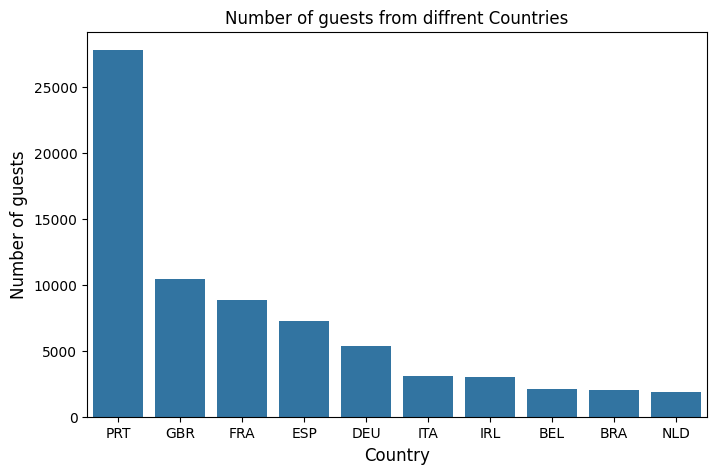

In [34]:
# Visualizing by  plotting the graph
plt.figure(figsize=(8,5))
sns.barplot(x=country_df['country'],y=country_df['count'])
plt.xlabel('Country',fontsize=12)
plt.ylabel('Number of guests',fontsize=12)
plt.title("Number of guests from diffrent Countries")
plt.show()

Insight:
Most of the guests are coming from portugal i.e more 25000 guests are from portugal.
(Abbreveations for countries:
PRT- Portugal, GBR- United Kingdom,FRA- France,ESP- Spain,DEU - Germany,ITA -Itlay,IRL - Ireland,BEL -Belgium,BRA -Brazil, NLD-Netherlands)

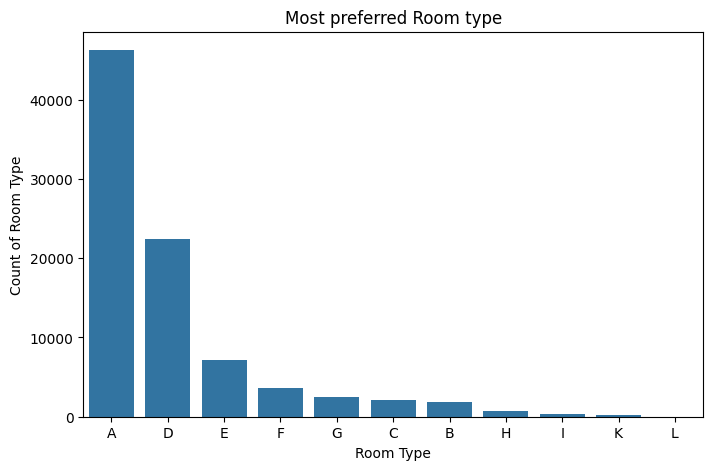

In [35]:
#set plotsize
plt.figure(figsize=(8,5))
#plotting
sns.countplot(x=df['assigned_room_type'],order=df['assigned_room_type'].value_counts().index)
#  set xlabel for the plot
plt.xlabel('Room Type')
# set y label for the plot
plt.ylabel('Count of Room Type')
#set title for the plot
plt.title("Most preferred Room type")
plt.show()

Insight:
The most preferred Room type is "A".

In [36]:
# Define the correct order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# categorizing the data
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

<ipython-input-37-2416920ef678>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bookings_by_months_df=df.groupby(['arrival_date_month'])['hotel'].count().reset_index()


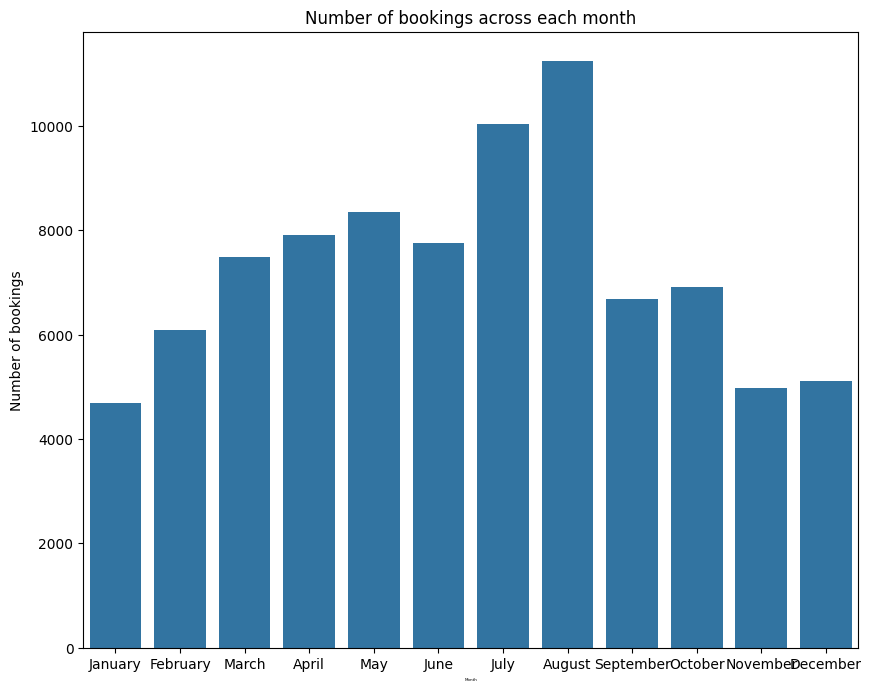

In [37]:
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=df.groupby(['arrival_date_month'])['hotel'].count().reset_index()
bookings_by_months_df.columns=['month','No of bookings']
#bookings_by_months_df
# set plot size
plt.figure(figsize=(10,8))
#plotting lineplot between x- months & y- booking counts
sns.barplot(x=bookings_by_months_df['month'],y=bookings_by_months_df['No of bookings'])
# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month',fontsize= 3)
#set y label
plt.ylabel('Number of bookings')
plt.show()


Insight:
There are more number of bookings in the month of August and July.

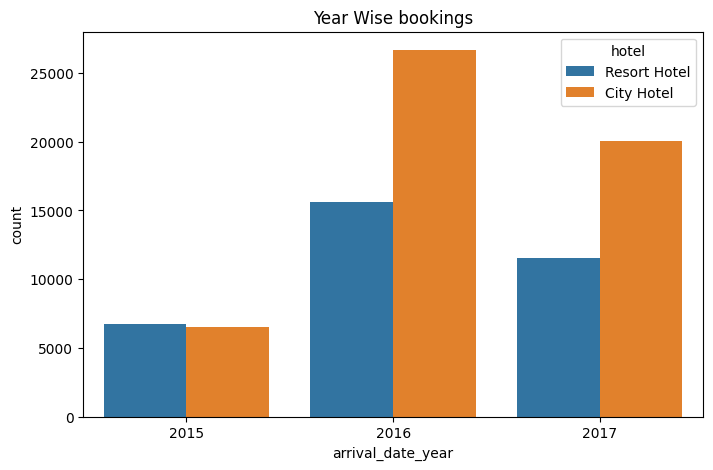

In [38]:
# set plot size
plt.figure(figsize=(8,5))

#  plot with countplot
sns.countplot(x=df['arrival_date_year'],hue=df['hotel'])
plt.title("Year Wise bookings")
plt.show()

Insight:
2016 had the higest number of bookings and 2015 had least bookings. Also the city hotels had more bookings compared to resort hotel.

In [39]:
# group by distribution channel and hotel
distribution_channel_df=df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()
distribution_channel_df

,distribution_channel,hotel,adr
0,Corporate,City Hotel,83.777368
1,Corporate,Resort Hotel,53.036835
2,Direct,City Hotel,112.606688
3,Direct,Resort Hotel,106.566215
4,GDS,City Hotel,120.317845
5,TA/TO,City Hotel,112.663552
6,TA/TO,Resort Hotel,101.578317
7,Undefined,City Hotel,29.625000
8,Undefined,Resort Hotel,112.700000


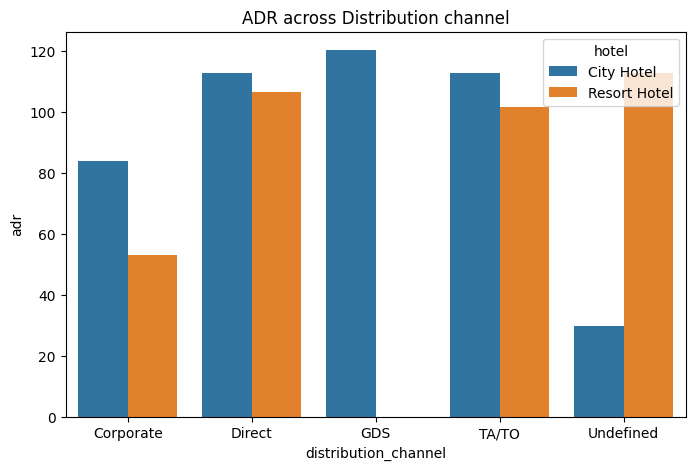

In [40]:
# set plot size and plot barchart
plt.figure(figsize=(8,5))
sns.barplot(x='distribution_channel', y='adr', data = distribution_channel_df, hue='hotel')
plt.title('ADR across Distribution channel')
plt.show()

Insights:
From the plot is clear that 'Direct' and 'TA/TO'(Travel agents or Travel operators) has almost equally contributed in adr in both type of hotels i.e. 'City Hotel' and 'Resort Hotel' followed by GDS(Global distribution system)



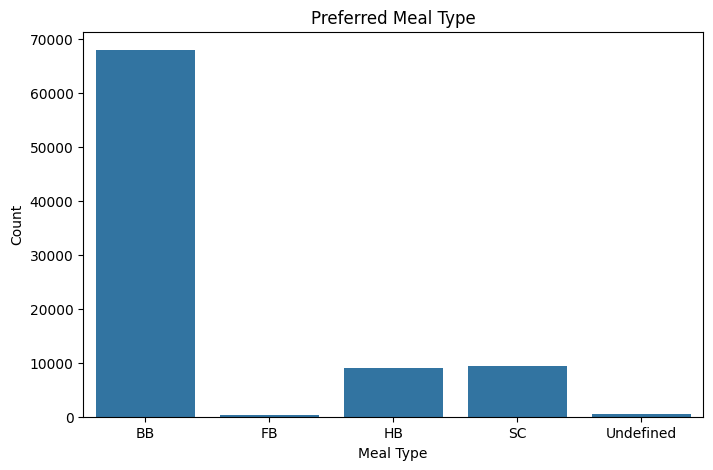

In [41]:
#df['meal'].value_counts().plot.pie( autopct='%1.1f%%', shadow=True, figsize=(10,5),fontsize=10)
plt.figure(figsize=(8,5))
sns.countplot(x=df['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")
plt.show()

Insights:
The most preferred meal type by the guests is BB( Bed and Breakfast). HB(Half Board) and SC(Self Catering) are equally preferred and FB(Full board) is least preferred.

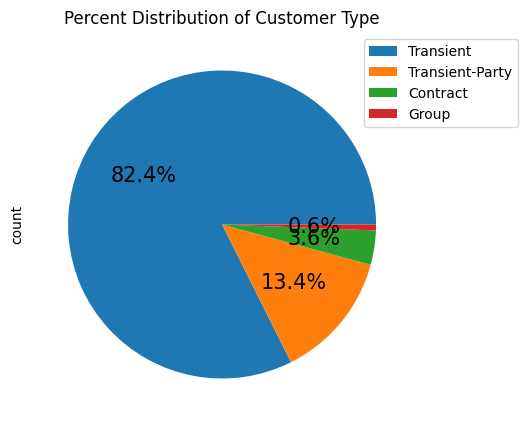

In [42]:
#The percentage distribution of "Customer Type"
df['customer_type'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,5),fontsize=15,labels=None)
labels=df['customer_type'].value_counts().index.tolist()
plt.title('Percent Distribution of Customer Type')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

Insights:
A transient customer is a person who is traveling temporarily and above pie chart shows they are a major market segment for hotels.

In [43]:
# return highest bookings made by agents
highest_bookings= df.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

# as agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True)

# taking top 10 bookings made by agent
top_ten_highest_bookings=highest_bookings[:10]
top_ten_highest_bookings

,agent,Most_Bookings
9,9.0,28721
174,240.0,13028
14,14.0,3342
7,7.0,3294
183,250.0,2779
175,241.0,1644
27,28.0,1493
8,8.0,1383
1,1.0,1228
6,6.0,1117


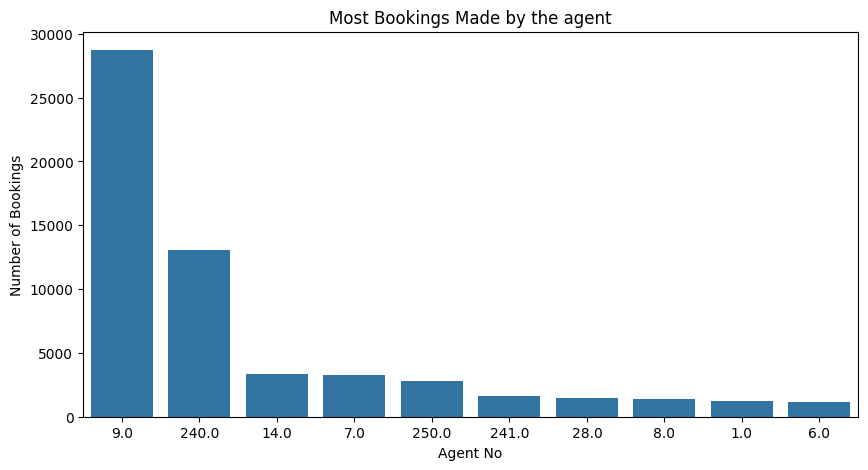

In [44]:
#Visualize
plt.figure(figsize=(10,5))
sns.barplot(x=top_ten_highest_bookings['agent'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")
plt.show()

Insights:
Agent with ID no. 9 has made most number of bookings.

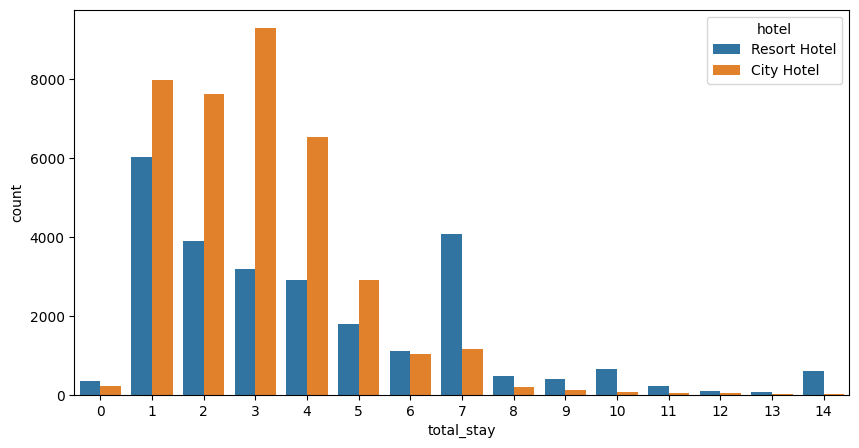

In [45]:
# total stay
not_canceled = df[df['is_canceled'] == 0]
d1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = d1['total_stay'], hue = d1['hotel'])
plt.show()

Most common stay length is between 1 to 4 days and generally people prefer City hotel for short stay ,whereas for long stays Resort Hotel is preferred.

In [46]:
# Define the correct order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# categorizing the data
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

<ipython-input-47-1ab8e0819ba6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_price = df.groupby('arrival_date_month')['adr'].mean()


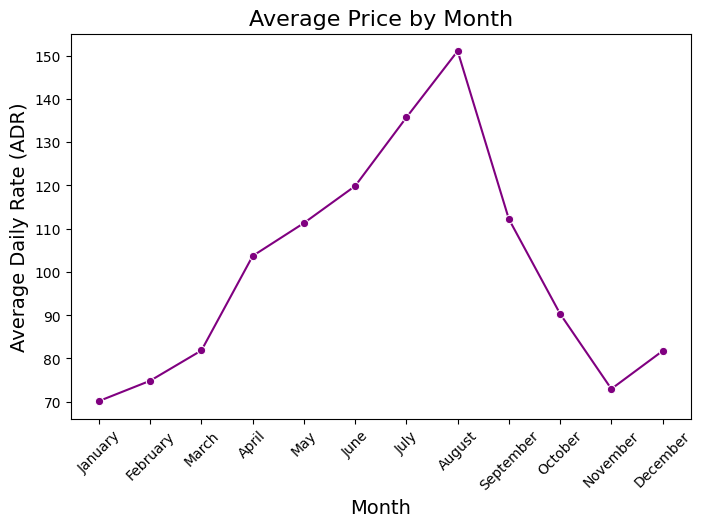

In [47]:
# Group by arrival_date_month and calculate the mean adr (average daily rate)
monthly_price = df.groupby('arrival_date_month')['adr'].mean()

# Plot the price variation by month
plt.figure(figsize=(8, 5))
sns.lineplot(x=monthly_price.index, y=monthly_price.values, marker='o', color='purple')
plt.title('Average Price by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Daily Rate (ADR)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

**Insights**
Average daily rate is more in the month of August followed by July.

---



---




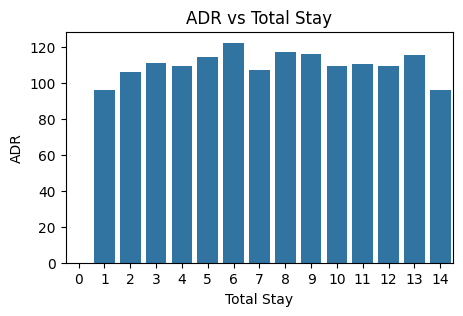

In [48]:
# Change in adr with respect to total stay
df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']
ts = df.groupby(['total_stay'])['adr'].mean().reset_index().rename(columns={'adr': 'mean_adr'})
ts = ts[ts['total_stay'] < 15]
plt.figure(figsize=(5,3))
sns.barplot(data=ts,x='total_stay',y='mean_adr')
plt.title('ADR vs Total Stay')
plt.xlabel('Total Stay')
plt.ylabel('ADR')
plt.show()





**Insight**
The above plot shows adr(average daily rate) is not much affected by total stay.

**Conclusion**







The exploratory data analysis of given dataset gives following interpretations:
-> City Hotel is mostly preffered over resort hotel by guests and has maximum bookings.

-> It also shows approx 27.5% of bookings are cancelled
and the percentage of repeated guests are also very few, which is around 3.9 % which means in order to retain the guests improvement in service is required.

-> There are more number of bookings in the month of August and July which may be due to vacations.

-> The city hotels had more bookings compared to resort hotel.

-> 'Direct' and 'TA/TO'(Travel agents or Travel operators) have almost equally contributed in adr in both type of hotels i.e. 'City Hotel' and 'Resort Hotel' followed by GDS.


